In [1]:
import sys
import csv
import json
import requests
import requests_cache
import numpy as np
import pandas as pd
#from yahoo_finance import Share
from pprint import pprint 
from datetime import datetime
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline

import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

import missingno as msno

In [2]:
requests_cache.install_cache('cache')

In [3]:
# Yahoo! YQL API
PUBLIC_API_URL = 'https://query.yahooapis.com/v1/public/yql'
OAUTH_API_URL = 'https://query.yahooapis.com/v1/yql'
DATATABLES_URL = 'store://datatables.org/alltableswithkeys'

def myreq(ticker, start, end):
    '''
    input ticker & dates as strings form 'YYYY-MM-DD'
    '''
    params = {'format':'json',
             'env':DATATABLES_URL}
    query = 'select * from yahoo.finance.historicaldata where symbol = "{}" and startDate = "{}" and endDate = "{}"'.format(ticker,start, end)
    params.update({'q':query})
    req = requests.get(PUBLIC_API_URL, params=params)
    req.raise_for_status()
    req = req.json()
    if req['query']['count'] > 0:
        result = req['query']['results']['quote']
        return result
    else:
        pass

In [4]:
#NEW price function
def price2(ticker):
    date=[]
    price=[]
    report = []
    
    years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
    for x in range(len(years)):
        c = myreq(ticker,'{}-01-01'.format(years[x]),'{}-12-31'.format(years[x]))
        try:
        
            for i in range(0,len(c)):
                date.append(pd.to_datetime(c[i]["Date"]))
                price.append(float(c[i][u'Close']))
                datef = pd.DataFrame(date)
                pricef = pd.DataFrame(price)
                table1 = pd.concat([datef,pricef],axis = 1)
                table1.columns = ['Date', ticker]
                table1 = table1.set_index("Date")
            
        except Exception:
            table1 = pd.DataFrame()
    
    return table1

In [5]:
csv = pd.read_csv('./companylist.csv')
# We want to keep "Finance, Health Care, Technology, Energy"
newcsv = csv[csv["Sector"].isin(["Finance", "Energy","Health Care","Technology"])].reset_index()
del newcsv["index"]

In [6]:
whole_list = newcsv['Symbol']

In [7]:
'''
#del df
for l in whole_list:
    get = price2(l)
    try:
        df = pd.concat([df,get],axis = 1)    # concat. by column 
    except NameError:
        df = pd.DataFrame(get)    # initialize automatically
    print l
# SAVE THE RESULT LOCALLY:
df.to_pickle('mydf')
'''

"\n#del df\nfor l in whole_list:\n    get = price2(l)\n    try:\n        df = pd.concat([df,get],axis = 1)    # concat. by column \n    except NameError:\n        df = pd.DataFrame(get)    # initialize automatically\n    print l\n# SAVE THE RESULT LOCALLY:\ndf.to_pickle('mydf')\n"

In [7]:
df = pd.read_pickle('mydf')

In [ ]:
# this allows us to see more rows of a dataframe to examine our data in depth
pd.options.display.max_columns = 20
pd.options.display.max_rows = 1000

In [26]:
df.iloc[-500:,:]

,PIH,FCCY,SRCE,VNET,TWOU,JOBS,ABEO,ABIL,ABMD,AXAS,...,ZLTQ,ZN,ZION,ZIONW,ZIOP,ZIXI,ZGNX,ZSAN,ZYNE,ZNGA
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-02,7.670,11.209999,30.559999,16.500000,18.110001,35.900002,3.19,9.820,51.860001,3.25,...,32.430000,1.50,24.620001,3.17,8.95,3.52,1.380000,11.090,NaN,2.57
2015-02-03,7.710,11.150002,31.299999,17.240000,17.660000,35.459999,3.15,9.820,52.889999,3.45,...,32.000000,1.57,25.299999,3.10,8.96,3.55,1.280000,11.050,NaN,2.59
2015-02-04,7.780,11.100001,31.059999,17.620001,17.870001,34.000000,3.10,9.960,54.150002,3.24,...,33.250000,1.63,24.820000,3.17,8.58,3.54,1.240000,11.050,NaN,2.58
2015-02-05,7.800,11.109997,31.360001,17.920000,17.969999,32.830002,3.10,9.960,55.520000,3.31,...,34.799999,1.66,25.700001,3.31,8.68,3.58,1.270000,11.010,NaN,2.64
2015-02-06,7.730,11.050000,32.009998,18.270000,18.200001,33.130001,3.09,9.960,57.939999,3.29,...,34.110001,1.69,26.090000,3.50,8.67,3.56,1.300000,11.000,NaN,2.74
2015-02-09,7.720,11.100001,31.280001,17.980000,18.309999,32.939999,3.00,9.980,56.810001,3.30,...,34.299999,1.75,25.799999,3.52,8.56,3.53,1.300000,11.020,NaN,2.75
2015-02-10,7.720,11.100001,31.350000,18.000000,18.250000,34.389999,3.00,9.920,57.689999,3.13,...,35.160000,1.85,25.670000,3.45,8.91,3.60,1.270000,11.040,NaN,2.80
2015-02-11,7.690,11.100001,31.020000,18.059999,17.590000,34.340000,3.13,9.890,58.900002,3.21,...,34.759998,1.88,25.510000,3.13,9.24,3.60,1.310000,11.010,NaN,2.81
2015-02-12,7.654,11.100001,31.600000,18.100000,17.490000,34.970001,3.10,9.890,59.930000,3.42,...,34.200001,1.84,26.270000,3.30,9.99,3.65,1.380000,11.010,NaN,2.66


In [11]:
"""
# For the purposes of labeling/analysis, TRANSPOSE() the data frame.
df_long = df.transpose()
# Create a temporary'Symbol' column (necessary later for merging Sector types)
df_long['Symbol'] = df_long.index
"""

"\n# For the purposes of labeling/analysis, TRANSPOSE() the data frame.\ndf_long = df.transpose()\n# Create a temporary'Symbol' column (necessary later for merging Sector types)\ndf_long['Symbol'] = df_long.index\n"

In [9]:
final = newcsv.reset_index()
df_long = df.transpose()
sector  = final[['Symbol','Sector']]
sector = sector.set_index('Symbol')

In [10]:
final = df_long.join(sector)

In [11]:
final

,2006-01-02 00:00:00,2006-01-03 00:00:00,2006-01-04 00:00:00,2006-01-05 00:00:00,2006-01-06 00:00:00,2006-01-09 00:00:00,2006-01-10 00:00:00,2006-01-11 00:00:00,2006-01-12 00:00:00,2006-01-13 00:00:00,...,2016-12-20 00:00:00,2016-12-21 00:00:00,2016-12-22 00:00:00,2016-12-23 00:00:00,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,Sector
PIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.601000,7.583000,7.400000,7.650000,NaN,7.400000,7.400000,7.250000,7.800000,Finance
FCCY,NaN,21.499973,21.499973,20.999980,20.519969,20.249976,19.999980,20.369968,20.000001,20.779999,...,17.549999,17.350000,17.280001,17.350000,NaN,18.100000,18.250000,18.000000,18.700001,Finance
SRCE,NaN,25.830002,25.659998,25.820004,25.950002,25.999997,25.999997,25.999997,25.940002,25.989997,...,45.000000,44.439999,44.400002,44.200001,NaN,44.740002,44.700001,45.330002,44.660000,Finance
VNET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.320000,7.100000,6.990000,7.050000,NaN,7.150000,7.090000,6.960000,7.010000,Technology
TWOU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.049999,32.099998,30.740000,30.809999,NaN,30.549999,30.340000,29.770000,30.150000,Technology
JOBS,NaN,14.950000,14.790000,16.150000,17.080000,17.900000,17.860001,17.950001,17.480000,17.809999,...,32.380001,32.820000,33.139999,33.169998,NaN,33.430000,33.650002,33.700001,33.799999,Technology
ABEO,NaN,0.510000,0.470000,0.460000,0.450000,0.430000,0.460000,0.500000,0.480000,0.440000,...,4.450000,4.250000,4.650000,4.800000,NaN,5.200000,5.100000,4.900000,4.850000,Health Care
ABIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770000,2.740000,2.600000,2.640000,NaN,2.800000,2.800000,2.720000,2.770000,Finance
ABMD,NaN,9.350000,9.620000,9.550000,9.750000,10.150000,10.210000,10.550000,10.710000,10.270000,...,113.099998,113.559998,111.550003,112.379997,NaN,113.739998,112.779999,113.580002,112.680000,Health Care
AXAS,NaN,5.550000,5.550000,5.810000,5.950000,5.550000,5.690000,5.500000,5.460000,5.420000,...,2.570000,2.630000,2.620000,2.610000,NaN,2.650000,2.640000,2.640000,2.570000,Energy


In [12]:
# take median within groups for each recorded date:
avg_sector = final.groupby('Sector').median().reset_index('Sector')
avg_sector = avg_sector.set_index('Sector')

In [13]:
avg_sector.iloc[:,1500:2000]

,2011-12-12 00:00:00,2011-12-13 00:00:00,2011-12-14 00:00:00,2011-12-15 00:00:00,2011-12-16 00:00:00,2011-12-19 00:00:00,2011-12-20 00:00:00,2011-12-21 00:00:00,2011-12-22 00:00:00,2011-12-23 00:00:00,...,2013-10-28 00:00:00,2013-10-29 00:00:00,2013-10-30 00:00:00,2013-10-31 00:00:00,2013-11-01 00:00:00,2013-11-04 00:00:00,2013-11-05 00:00:00,2013-11-06 00:00:00,2013-11-07 00:00:00,2013-11-08 00:00:00
Sector,,,,,,,,,,,,,,,,,,,,,
Energy,12.41,12.335,12.125,12.180,12.170000,12.00,12.64,12.400000,13.34,13.57,...,17.870000,18.070000,17.565001,17.355,17.370000,17.985,19.229999,18.465,18.385001,18.844999
Finance,11.91,11.765,11.780,11.845,11.790000,11.72,11.97,12.365000,12.42,12.55,...,17.790001,17.790001,17.780001,17.410,17.299999,17.340,17.420000,17.500,17.320000,17.575000
Health Care,3.98,3.850,3.910,3.940,3.839998,3.65,3.83,3.840000,3.80,3.79,...,7.235000,7.230000,7.045000,7.055,7.070000,7.015,7.040000,7.040,7.000000,7.360000
Technology,9.71,9.835,9.465,9.595,9.580000,9.35,9.91,9.800001,9.87,9.97,...,13.735000,13.790000,13.780000,13.240,13.400000,13.310,13.330000,13.270,13.110000,13.350000


In [14]:
# Dates as index for plotting
# This is basically the original DF (transposed and transposed back)
# but the columns are now the Sector averages.
avg_T = avg_sector.transpose()

## Volatility Analysis

In [16]:
# A new DF for the difference between each day:
delta_df = pd.DataFrame()
for sect in avg_T.columns:
    delta_df[sect] = (avg_T[sect] - avg_T[sect].shift(1))/avg_T[sect].shift(1) 
delta_df.columns = map(lambda name: '{} Changes'.format(name),avg_T.columns)

# On what day did the stock price spike the most?
abs(delta_df).idxmax()

Energy Changes        2008-11-26
Finance Changes       2013-01-02
Health Care Changes   2016-12-27
Technology Changes    2006-01-03
dtype: datetime64[ns]

In [17]:
# we need to look through this dataframe to see why there's a dramatic jump in price variation
delta_df.iloc[1500:,:]

,Energy Changes,Finance Changes,Health Care Changes,Technology Changes
2011-12-12,-0.027048,-0.020962,0.007596,-0.029000
2011-12-13,-0.006044,-0.012175,-0.032663,0.012873
2011-12-14,-0.017025,0.001275,0.015584,-0.037621
2011-12-15,0.004536,0.005518,0.007673,0.013735
2011-12-16,-0.000821,-0.004643,-0.025381,-0.001563
2011-12-19,-0.013969,-0.005937,-0.049479,-0.024008
2011-12-20,0.053333,0.021331,0.049315,0.059893
2011-12-21,-0.018987,0.032999,0.002611,-0.011100
2011-12-22,0.075806,0.004448,-0.010417,0.007143
2011-12-23,0.017241,0.010467,-0.002632,0.010132


In [31]:
shade = delta_df['Energy Changes']

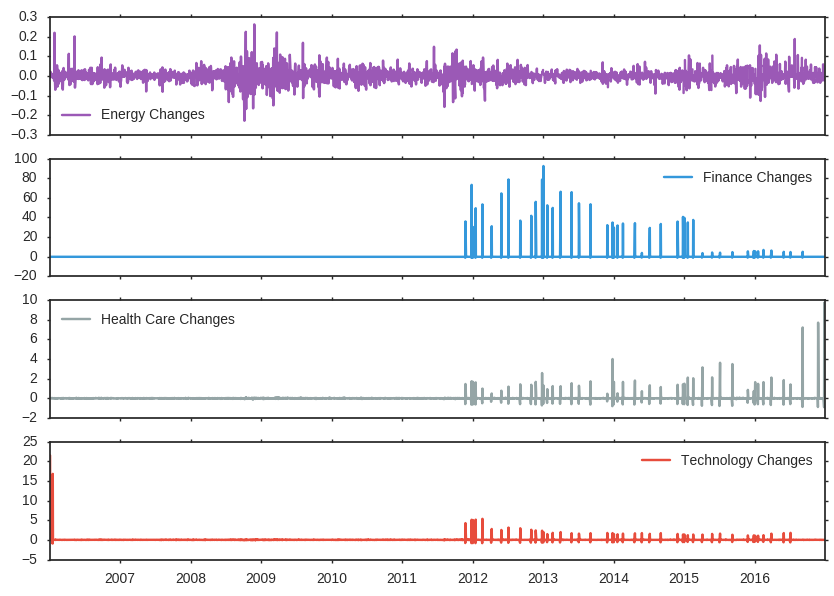

In [18]:
plot_cols = list(delta_df)

# 2 axes for 2 subplots
fig, axes = plt.subplots(4,1, figsize=(10,7), sharex=True)
delta_df[plot_cols].plot(subplots=True, ax=axes)
#plt.ylim([-0.20,0.150])
plt.show()

#### Mega-function with everything related to the NYT API inside (work in progress)

In [22]:
from nytimesarticle import articleAPI
import time
api = articleAPI('2679a66fe8df4740b754f98e52ad068c')
def news_articles(sector,pages):
    sector_df = pd.DataFrame()
    for i in range(pages):
        try:
            if sector == 'Health Care':
                sector_articles = api.search( 
                    q = 'Health Care',
                    fq = {
                        'subject.contains':['Health', 'Care','Insurance','Drug'],
                        'type_of_material':'News'},
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                    )
            if sector == 'Technology':
                sector_articles = api.search(
                    q = 'Tech',
                    fq = {
                        'section_name':'Technology',
                        'subject.contains':'Mergers, Acquisitions and Divestitures',
                        'type_of_material':'News'
                        },
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                )
            if sector == 'Energy':
                sector_articles = api.search( 
                    q = 'stock',
                    fq = {
                        'subject.contains':['Energy','Oil','Renewable','Gas'],
                        'section_name':'Business Day',
                        'type_of_material':'News'
                        }, 
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                )
            if sector == 'Finance':
                sector_articles = api.search( 
                    q = 'stock',
                    fq = {
                        'subject.contains':['Bank','Financial','Loan'],
                        'section_name.contains':['Business','Finance'],
                        'type_of_material':'News'
                        }, 
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                )
            df_i = sector_articles['response']['docs']
            sector_df = sector_df.append(df_i) 
            time.sleep(1)   # API only allows 5 calls per second. This slows it down!
        except KeyError:
            break
        except IndexError:
            break
    return sector_df.reset_index()

ImportError: No module named nytimesarticle

In [ ]:
# This stuff should be cached?
healthcare_news = news_articles('Health Care',30)

In [ ]:
print healthcare_news.shape

In [ ]:
tech_news = news_articles('Technology',10)

In [ ]:
print tech_news.shape

In [ ]:
energy_news = news_articles('Energy',30)

In [ ]:
finance_news = news_articles('Finance',10)

In [ ]:
finance_news.shape

In [ ]:
health_labels = [d.get('main') for d in healthcare_news.headline]
health_x = list(pd.to_datetime(healthcare_news['pub_date']))
tech_labels = [d.get('main') for d in tech_news.headline]
tech_x = list(pd.to_datetime(tech_news['pub_date']))
energy_labels = [d.get('main') for d in energy_news.headline]
energy_x = list(pd.to_datetime(energy_news['pub_date']))
finance_labels = [d.get('main') for d in finance_news.headline]
finance_x = list(pd.to_datetime(finance_news['pub_date']))

headlines = health_labels+tech_labels+energy_labels+finance_labels
pub_dates = health_x+tech_x+energy_x+finance_x

date_range = [min(pub_dates),max(pub_dates)]
sector_level = [1]*len(health_x)+[2]*len(tech_x)+[3]*len(energy_x)+[4]*len(finance_x)

### Timeline:

In [ ]:
# how to create an interactive timeline
import mpld3
from mpld3 import plugins
# This is our attempt at creating an interactive "TIMELINE"
# we cannot figure out how to erase y-axis
fig, ax = plt.subplots(figsize=(12,4))
scatter = ax.scatter(pub_dates, sector_level,
           c=sector_level,marker='>', s=300)
fig.autofmt_xdate()
ax.set_xlim(date_range)
plt.yticks(range(6))
tooltip = plugins.PointLabelTooltip(scatter, headlines)
plugins.connect(fig, tooltip)
mpld3.display()

# Time Series Analyis

In [ ]:
ts_eng = delta_df['Energy Changes']
# Why do we get an NA for Nov 1 2016?
# Need to change following date range
ts_eng['2016-11-02':'2017-03-01']

## Check Stationarity

Dickey-Fuller Test: tests the null hypothesis of whether a u nit root is present in an autoregressive model.  

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput


In [ ]:
test_stationarity(ts_eng)